### Pre-processing EEG data with MNE-Python
Datagenerated in BrainVision Recorder software (.vhdr, .eeg, .vmrk)

In [1]:
import mne
mne.set_log_level('error')

import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

#### Loading data

In [2]:
glob.glob('data_brainvision/Metzler0004*')

['data_brainvision\\Metzler0004.eeg',
 'data_brainvision\\Metzler0004.vhdr',
 'data_brainvision\\Metzler0004.vmrk']

In [3]:
#Subject files 0004
path = f'data_brainvision/'
name_file = ['Metzler0004.eeg', 'Metzler0004.vhdr', 'Metzler0004.vmrk']
file = [path + name for name in name_file]

#Reading EEG files
raw_data = mne.io.read_raw_brainvision(file[1], preload=True) #Preloading raw data into memory
raw_data

<RawBrainVision | Metzler0004.eeg, 64 x 1823140 (1823.1 s), ~890.3 MB, data loaded>

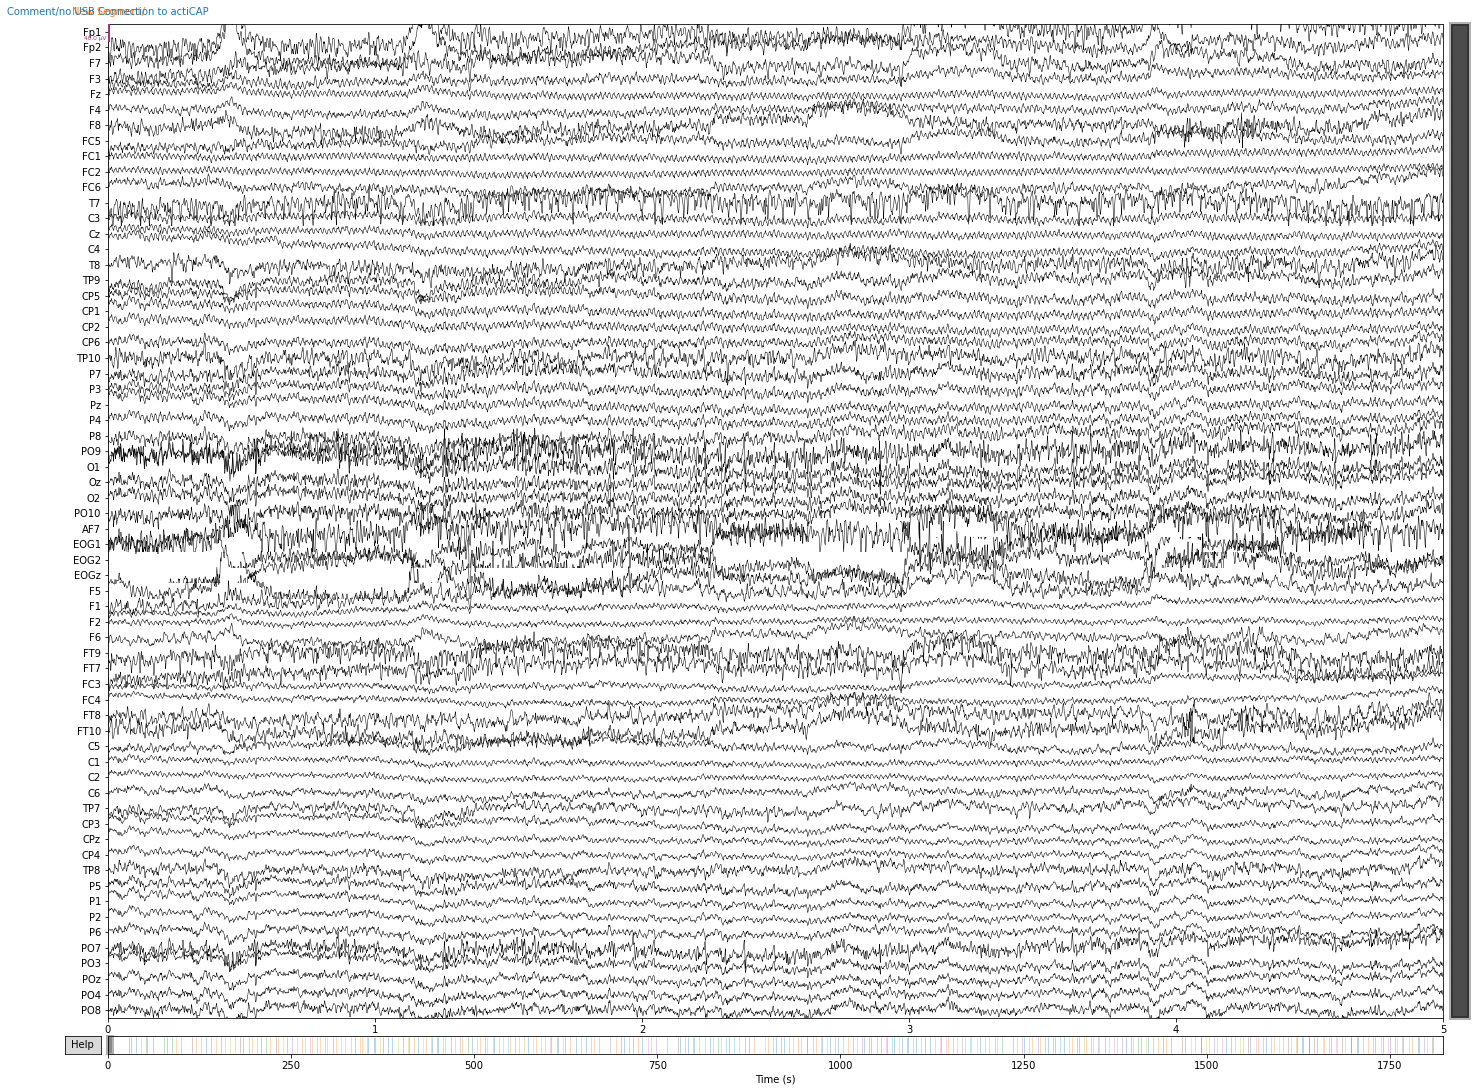

In [4]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,15')

#Plotting raw data data from all channels
raw_data.plot(n_channels=64, duration=5);

#### Working with metadata

In [5]:
#Viewing keys in the raw data
raw_data.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [6]:
#Viewing dictionary of raw data
raw_data.__dict__

{'_last_samps': array([1823139]),
 '_first_samps': array([0]),
 'info': <Info | 7 non-empty values
  bads: []
  ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
  chs: 64 EEG
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 250.0 Hz
  meas_date: 2015-10-02 15:10:43 UTC
  nchan: 64
  projs: []
  sfreq: 1000.0 Hz
 >,
 'buffer_size_sec': 1.0,
 '_cals': array([1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07]),
 '_raw_extras': [{'offsets': None,


In [7]:
#Viewing channel names
print(raw_data.info['ch_names'])

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'AF7', 'EOG1', 'EOG2', 'EOGz', 'F5', 'F1', 'F2', 'F6', 'FT9', 'FT7', 'FC3', 'FC4', 'FT8', 'FT10', 'C5', 'C1', 'C2', 'C6', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8']


In [8]:
#Setting the reference channel for eyes movement
raw_data.set_channel_types({'EOG1': 'eog', 'EOG2': 'eog', 'EOGz': 'eog'})

<RawBrainVision | Metzler0004.eeg, 64 x 1823140 (1823.1 s), ~890.3 MB, data loaded>

In [9]:
#Setting the 10-20 pattern in the channel position
raw_data.set_montage('standard_1020')
raw_data.info['dig']

[<DigPoint |        LPA : (-82.5, 0.0, 0.0) mm      : head frame>,
 <DigPoint |     Nasion : (-0.0, 114.0, 0.0) mm     : head frame>,
 <DigPoint |        RPA : (82.5, -0.0, -0.0) mm     : head frame>,
 <DigPoint |     EEG #1 : (-30.9, 114.6, 27.9) mm   : head frame>,
 <DigPoint |     EEG #3 : (28.4, 115.3, 27.7) mm    : head frame>,
 <DigPoint |     EEG #5 : (-56.4, 99.2, 25.1) mm    : head frame>,
 <DigPoint |    EEG #16 : (-71.9, 73.1, 25.8) mm    : head frame>,
 <DigPoint |    EEG #17 : (-66.1, 80.2, 53.8) mm    : head frame>,
 <DigPoint |    EEG #18 : (-51.8, 86.7, 78.7) mm    : head frame>,
 <DigPoint |    EEG #19 : (-29.0, 91.4, 96.6) mm    : head frame>,
 <DigPoint |    EEG #20 : (-1.2, 93.3, 102.6) mm    : head frame>,
 <DigPoint |    EEG #21 : (28.0, 91.9, 95.8) mm     : head frame>,
 <DigPoint |    EEG #22 : (50.3, 87.4, 77.3) mm     : head frame>,
 <DigPoint |    EEG #23 : (66.3, 81.5, 53.1) mm     : head frame>,
 <DigPoint |    EEG #24 : (71.4, 74.5, 25.1) mm     : head fra

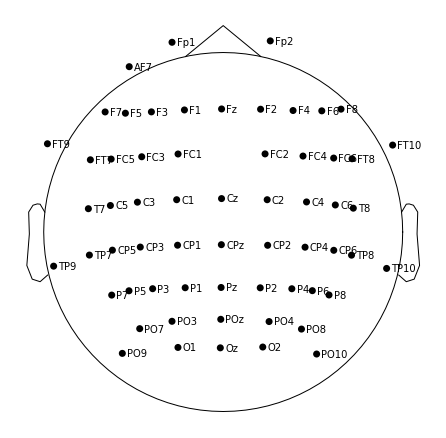

In [10]:
#Plotting the name and position of sensors
raw_data.plot_sensors(show_names=True);

#### Filters

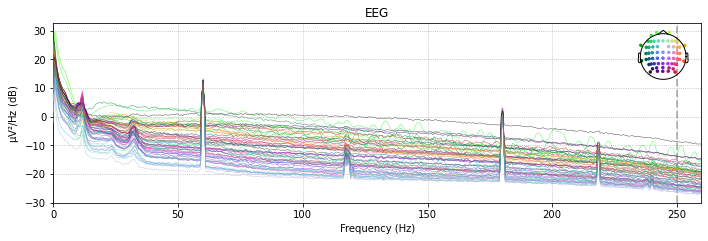

In [11]:
fig = raw_data.plot_psd(fmax=260);

##### Band-pass

In [12]:
#Band-pass filter (low-pass = 0.1Hz and high-pass = 35Hz)
f_data = raw_data.copy().filter(l_freq=0.1, h_freq=35)
del raw_data

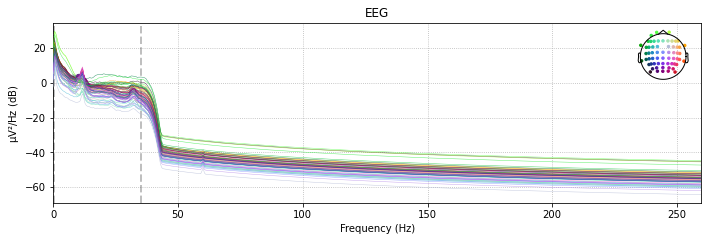

In [13]:
fig = f_data.plot_psd(fmax=260)

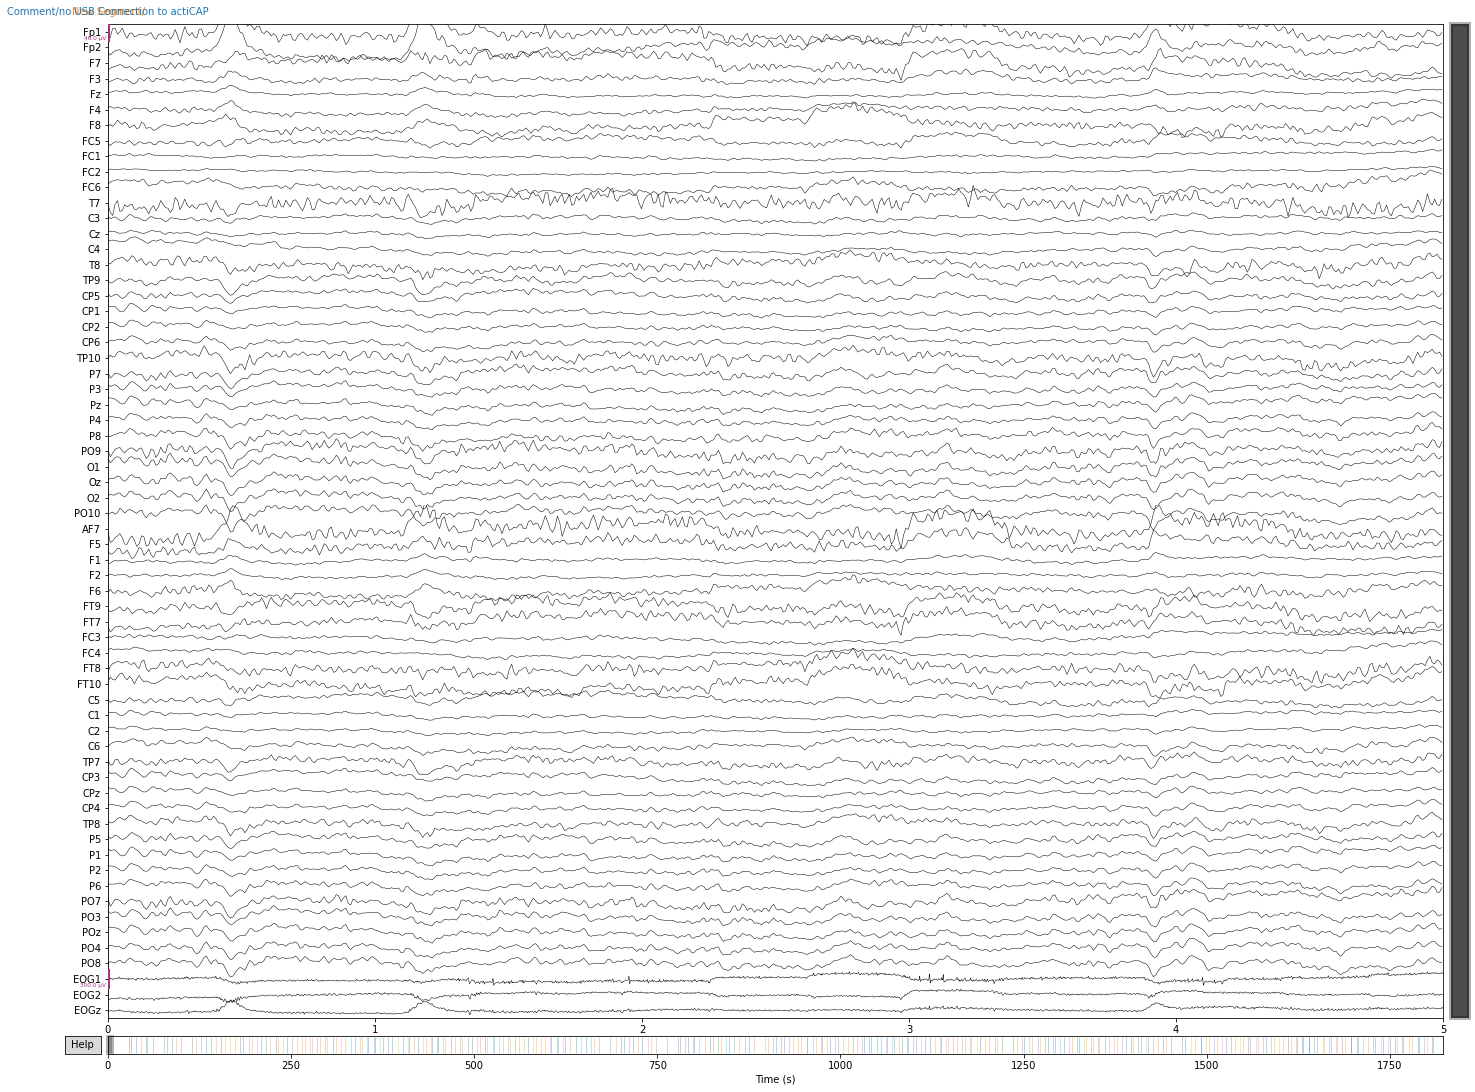

In [14]:
#Plotting filtered data
f_data.plot(n_channels=64, duration=5);

##### ICA

In [15]:
#Band-pass filter for ICA application
f_data.filter(l_freq=1.0, h_freq=30);

In [16]:
# Break filtered data into 1 s epochs
tstep = 1.0
events_ica = mne.make_fixed_length_events(f_data, duration=tstep)
epochs_ica = mne.Epochs(f_data, events_ica, tmin=0.0, tmax=tstep, baseline=None, preload=True)

In [22]:
from autoreject import AutoReject
ar = AutoReject()
epochs_clean = ar.fit_transform(epochs_ica)


Running autoreject on ch_type=eeg




Estimated consensus=0.40 and n_interpolate=1


In [ ]:
from autoreject import Ransac
rsc = Ransac()
epochs_clean = rsc.fit_transform(epochs_ica)  

In [17]:
from autoreject import get_rejection_threshold

reject = get_rejection_threshold(epochs_ica);
reject

Estimating rejection dictionary for eeg
Estimating rejection dictionary for eog


{'eeg': 0.00013337671292773057, 'eog': 0.0003744}

In [18]:
# ICA parameters
random_state = 42   # ensures ICA is reproducable each time it's run
ica_n_components = .99     # Specify n_components as a decimal to set % explained variance

# Fit ICA
ica = mne.preprocessing.ICA(n_components=ica_n_components, random_state=random_state)
ica.fit(epochs_ica, reject=reject, tstep=tstep)

<ICA | epochs decomposition, method: fastica (fit in 29 iterations on 1824823 samples), 24 ICA components explaining 99.1 % of variance (61 PCA components available), channel types: eeg, no sources marked for exclusion>

In [ ]:
#Removal of physiological artifacts
from mne.preprocessing import ICA

ica = ICA(n_components=24, method='infomax', random_state=42)
ica.fit(f_data, decim=10)

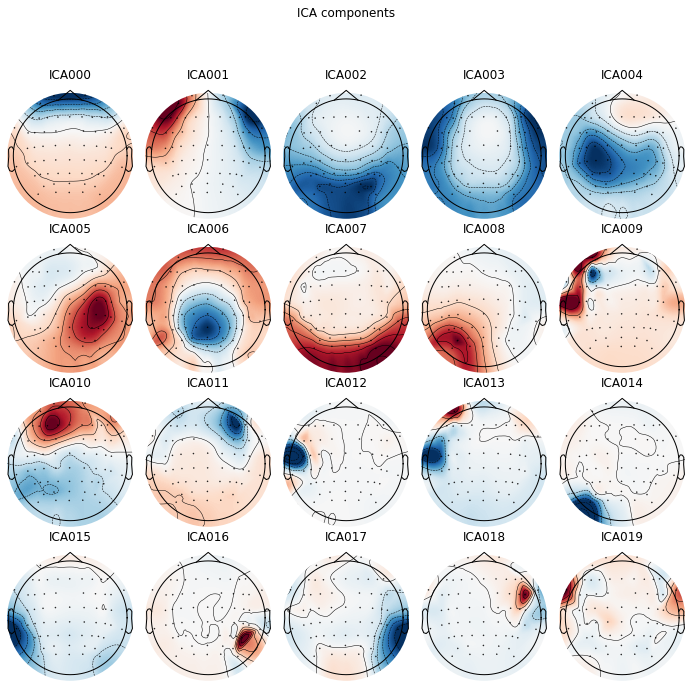

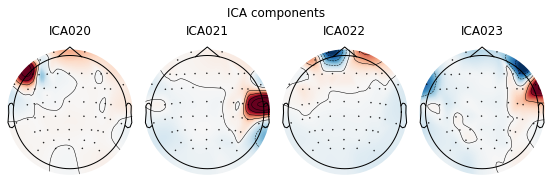

In [19]:
ica.plot_components();

c:\Users\abner\anaconda3\lib\site-packages\mne\viz\ica.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize, facecolor=[0.95] * 3)


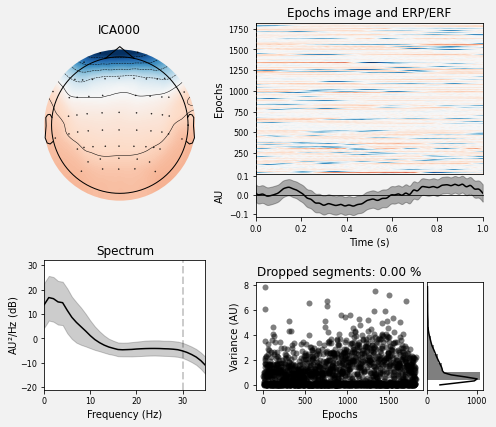

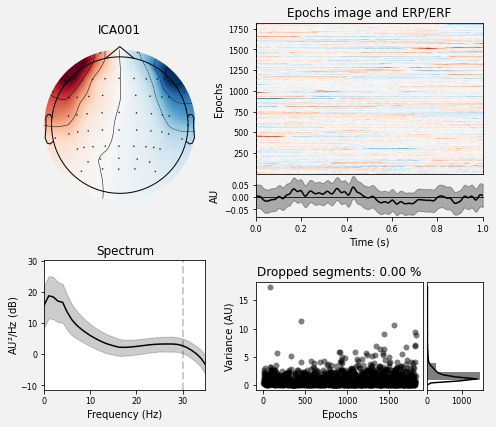

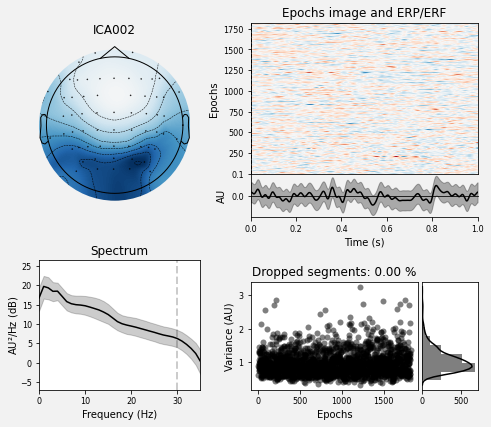

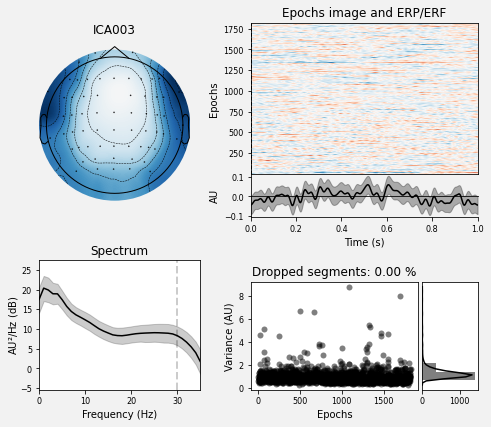

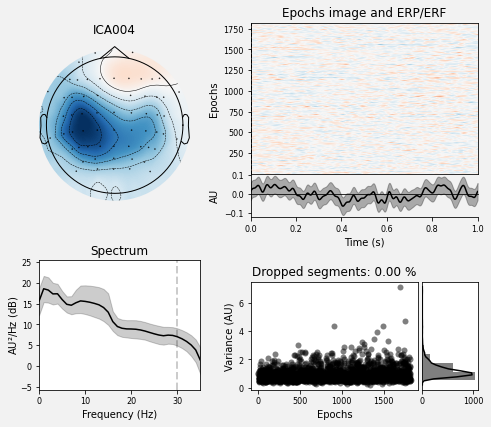

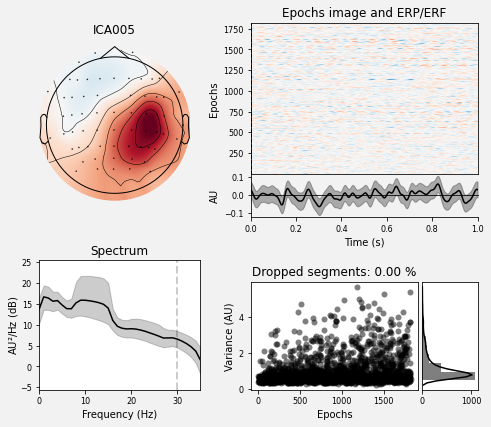

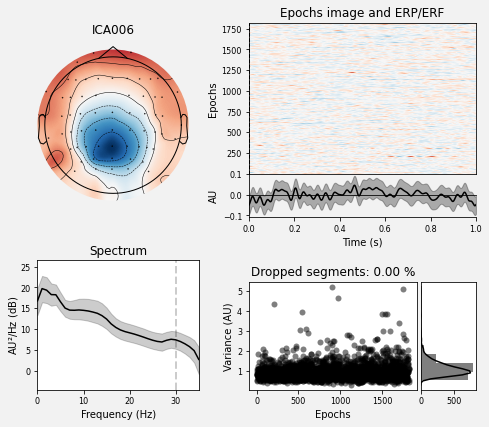

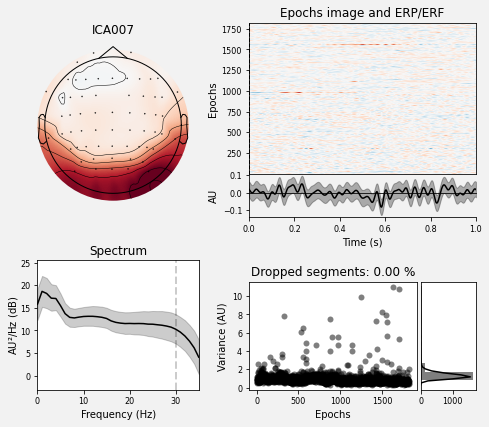

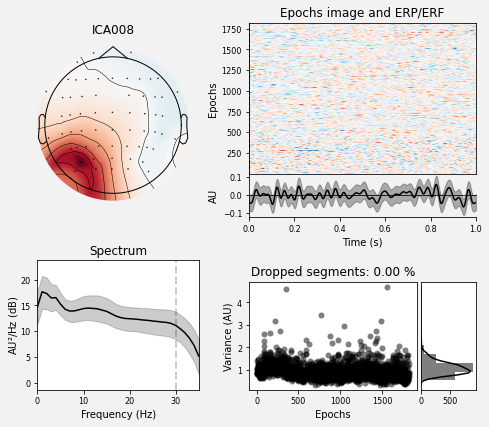

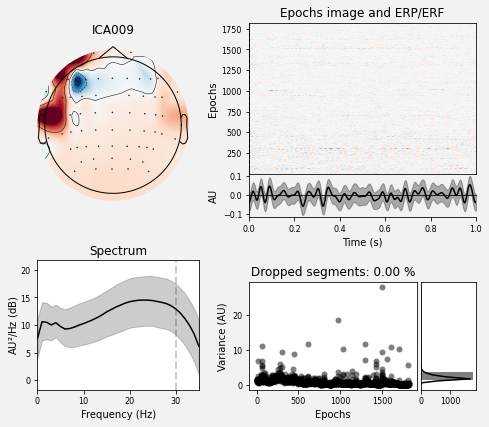

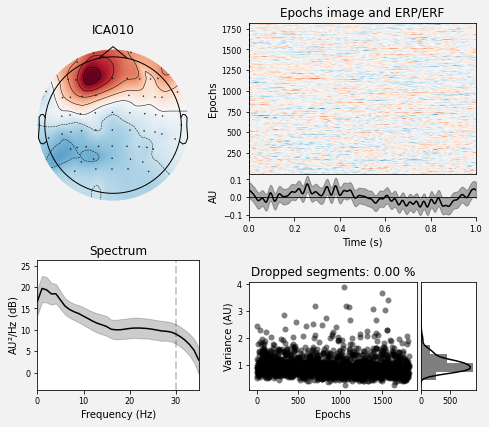

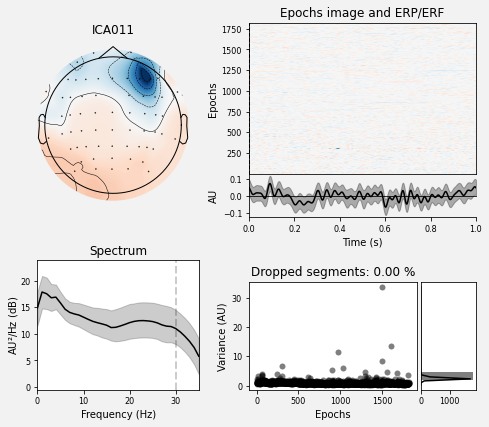

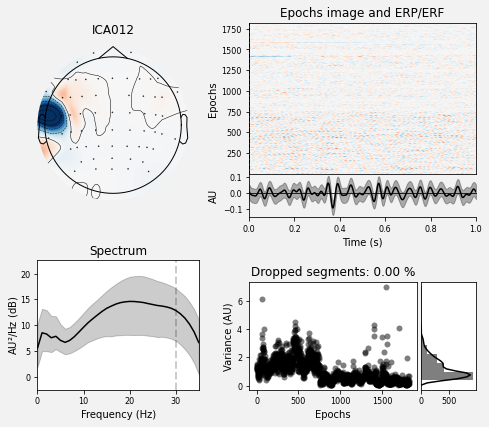

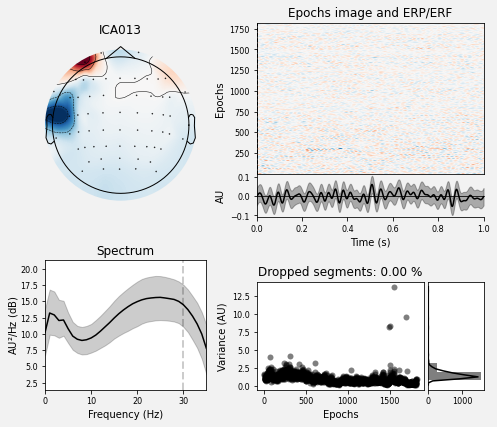

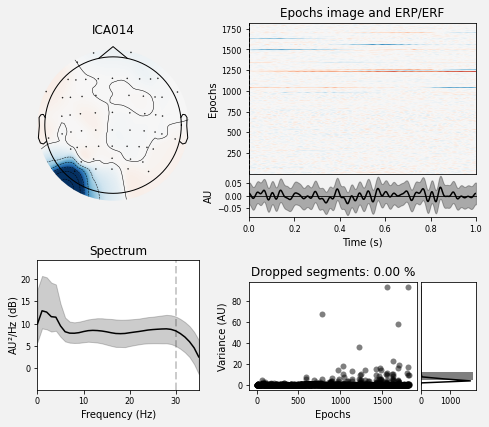

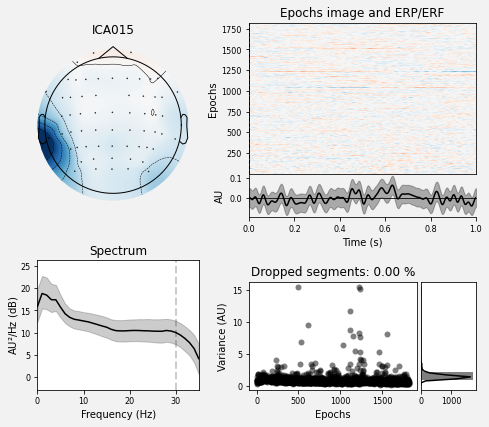

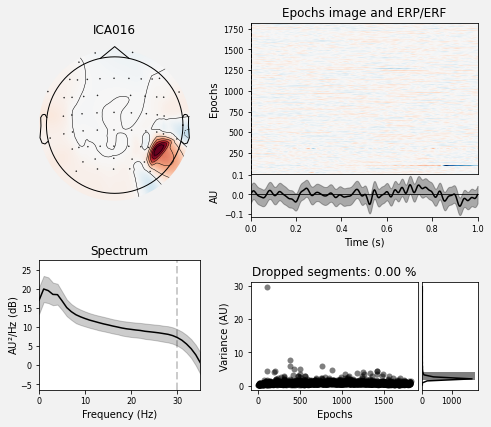

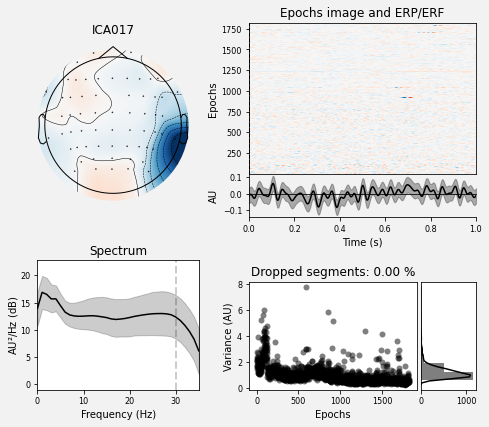

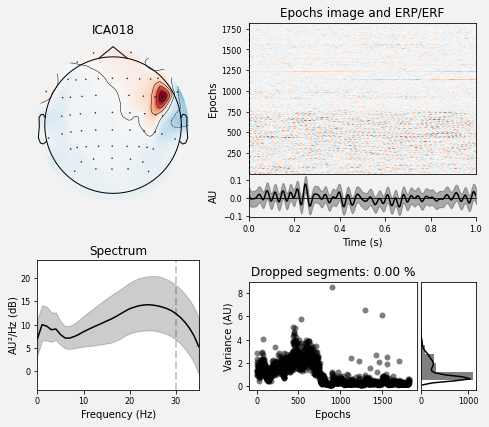

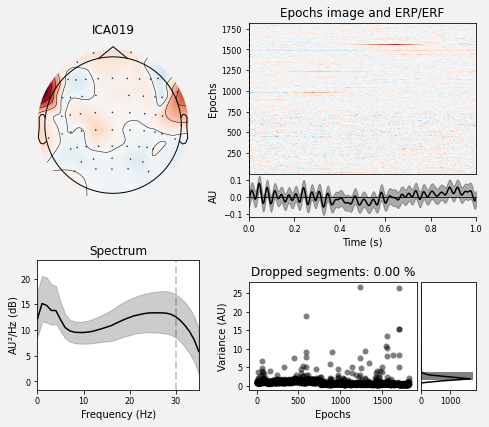

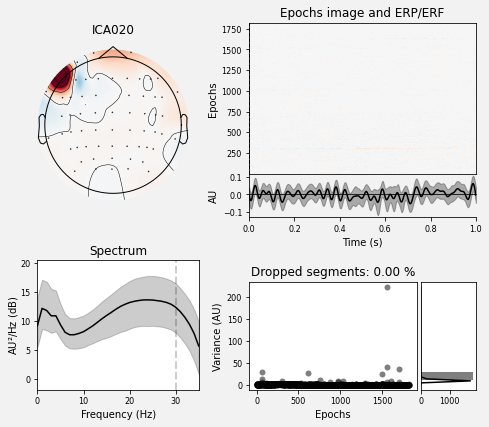

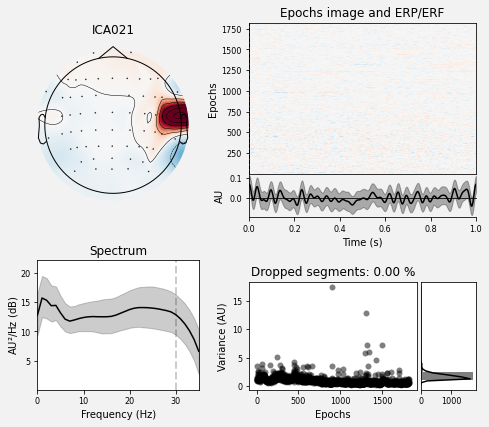

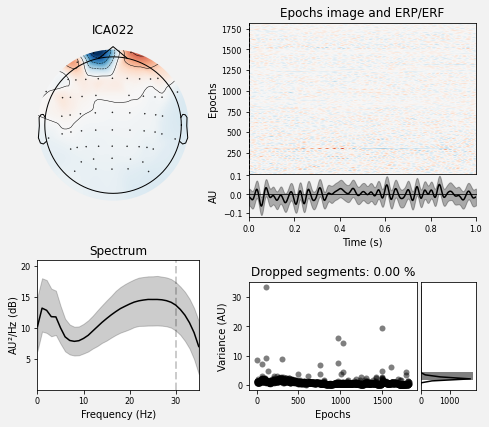

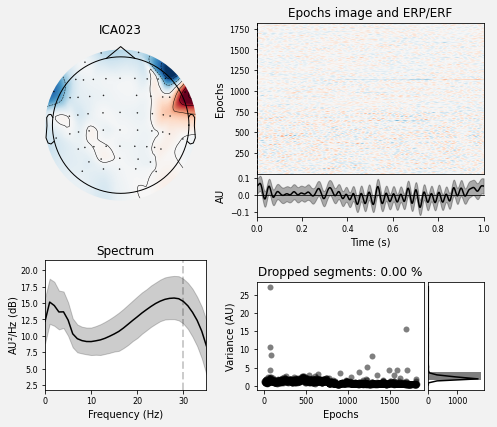

In [21]:
#ica.plot_properties(f_data, 0);
ica.plot_properties(epochs_ica, picks=range(0, ica.n_components_), psd_args={'fmax': 35});

In [ ]:
ica.exclude = [0,3]
f_data_ica= ica.apply(f_data)
f_data_ica.plot();

In [ ]:
#Interpolate bad channels
f_data_ica.interpolate_bads()

In [ ]:
#Downsampling
f_data.info['sfreq']
#f_data.resample(500)

In [ ]:
#Marking bad channels
#f_data.info['bads'] = ['T7']
#f_data

#### Selecting channels

In [ ]:
#Selecting only the frontal, parietal, and reference lobe channels for eye movement
s_data = f_data_ica.copy().pick_channels(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'Fz',
                                      'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'Pz',
                                      'EOG1', 'EOG2', 'EOGz'])
s_data

In [ ]:
#Plotting filtered data from selected channels
s_data.plot(n_channels=21);

#### Trials

In [ ]:
mne.events_from_annotations(s_data)

In [ ]:
#Data Segmentation
events_from_annot, event_dict = mne.events_from_annotations(s_data)

In [ ]:
events_from_annot

In [ ]:
epochs = mne.Epochs(s_data, events_from_annot, event_id=event_dict, tmin=0, tmax=2, baseline=(0, 0), event_repeated='drop', preload=True)

In [ ]:
epochs.plot();

In [ ]:
#Re-reference
epochs.set_eeg_reference(ref_channels='average')

#### Save dataset final

In [ ]:
#Datetime of the experiment
meas_date = s_data.info['meas_date']

#Dataframe with the events
dt_eeg = s_data.to_data_frame()

#Change time column to datetime type
dt_eeg['time'] = pd.to_datetime(dt_eeg['time'], unit='ms')

#Change dataframe index to a time column
#dt_eeg.index = dt_eeg.time

#To save the data in a .csv file